  # Real Estate Pricing  Analysis in Germany 

## Import important libaries 

In [364]:
import numpy as np  # libary to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
! pip install geocoder
!pip install folium
import json #library to handle Jason files 
import geocoder as geocoder
from geopy.geocoders import Nominatim  # converts an address into latitude and longitude
import requests # library to handle requests 
from pandas.io.json  import json_normalize # converts JSON file into a pandas dataframe

import matplotlib.cm as cm 
import matplotlib.colors as colors 

from sklearn.cluster  import KMeans 


import folium #map rendering library

print ('Done')

Done


In [365]:
!pip install ibm-cos-sdk

In [366]:
import ibm_boto3
from botocore.client import Config
import json
import pandas as pd


## Import the  dataset 

In [367]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a19cac713f4341438dcf07ed8bdc2bb2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='j6vl78EICDYVZTO39ocHrCrxkgljY4q1yzXcGaPLPqoP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a19cac713f4341438dcf07ed8bdc2bb2.get_object(Bucket='ibmdatasciencefinalproject-donotdelete-pr-u7grxk0dsrlrhs',Key='apr20.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


obj_regio1  Unnamed: 0  obj_heatingType ga_cd_customer_group  \
0             Sachsen           0        heat_pump         home_builder   
1              Berlin           1  central_heating                  NaN   
2   Baden_Württemberg           2    stove_heating                  NaN   
3  Schleswig_Holstein           3              NaN                  NaN   
4       Niedersachsen           4              NaN         home_builder   

      obj_cId obj_newlyConst  obj_plotAreaRange  \
0    544685.0              y                3.0   
1   5240003.0              n                2.0   
2    954015.0              n                2.0   
3    134629.0              n                1.0   
4  18406763.0              n                4.0   

                                         obj_picture  obj_picturecount  \
0  https://pictures.immobilienscout24.de/listings...              16.0   
1  https://pictures.immobilienscout24.de/listings...              10.0   
2  https://pictures.immobilienscout24.de/listings...              36.0   
3  https://pictures.immobilienscout24.de/listings...              19.0   
4  https://pictures.immobilienscout24.de/listings...               6.0   

   obj_pricetrend  obj_lotArea  obj_yearConstructed  obj_pricetrendbuy  \
0            9.12       742.00               2021.0               9.12   
1           11.35       580.00               1934.0              11.35   
2            5.59       554.00               1920.0               5.59   
3            9.62       117.18               1972.0               9.62   
4           11.40       855.00                  NaN              11.40   

   obj_scoutId  obj_noParkSpaces obj_firingTypes  obj_ExclusiveExpose  \
0  117367921.0               2.0  no_information                 True   
1  117367513.0               NaN             gas                False   
2  117027187.0               2.0            wood                False   
3  117367656.0               NaN             gas                 True   
4  117367740.0               NaN  no_information                 True   

  obj_courtage             geo_bln obj_cellar  obj_purchasePriceRange  \
0            n             Sachsen          n                     8.0   
1            y              Berlin          y                     9.0   
2            y   Baden_Württemberg          y                     4.0   
3            y  Schleswig_Holstein          y                     7.0   
4            n       Niedersachsen          n                     6.0   

   obj_yearConstructedRange obj_houseNumber      obj_energyType  \
0                       9.0  no_information     energy_required   
1                       1.0               0                 NaN   
2                       1.0  no_information     energy_required   
3                       3.0  no_information  energy_consumption   
4                       NaN  no_information                 NaN   

   obj_pricetrendrent  obj_livingSpace             geo_krs  obj_zipCode  \
0                6.79           152.00       Leipzig_Kreis       4571.0   
1                5.78            65.00              Berlin      12357.0   
2                6.11           159.00  Rhein_Neckar_Kreis      69434.0   
3                6.03           104.78      Segeberg_Kreis      24558.0   
4                3.65           140.00       Emsland_Kreis      49774.0   

    obj_condition obj_interiorQual obj_energyEfficiencyClass  \
0  first_time_use    sophisticated                    A_PLUS   
1     refurbished   no_information                       NaN   
2  no_information           simple                         H   
3  no_information   no_information                         C   
4  no_information   no_information                       NaN   

   ga_cd_cxp_historicallisting      obj_street obj_streetPlain  geo_plz  \
0                        False  no_information  no_information   4571.0   
1                        False       Windenweg       Windenweg  12357.0   
2                    

## Drop unnecessary columns 

In [368]:
 df_data_1.drop(df_data_1.columns.difference(['obj_regio1','obj_heatingType','obj_livingSpace','obj_zipCode','obj_condition','obj_purchasePrice','obj_buildingType','obj_noRoomsRange']),1,inplace=True)
 df_data_1.head()

obj_regio1  obj_heatingType  obj_livingSpace  obj_zipCode  \
0             Sachsen        heat_pump           152.00       4571.0   
1              Berlin  central_heating            65.00      12357.0   
2   Baden_Württemberg    stove_heating           159.00      69434.0   
3  Schleswig_Holstein              NaN           104.78      24558.0   
4       Niedersachsen              NaN           140.00      49774.0   

    obj_condition  obj_purchasePrice     obj_buildingType  obj_noRoomsRange  
0  first_time_use           445900.0  single_family_house               4.0  
1     refurbished           545000.0   semidetached_house               2.0  
2  no_information           195000.0  single_family_house               5.0  
3  no_information           309000.0    mid_terrace_house               4.0  
4  no_information           267777.0       no_information               5.0

In [369]:
df_data_1=df_data_1.astype({'obj_heatingType':object,'obj_livingSpace':int,'obj_zipCode':int,'obj_condition':object,'obj_purchasePrice':int,'obj_noRoomsRange':int})
df_data_1.head()

obj_regio1  obj_heatingType  obj_livingSpace  obj_zipCode  \
0             Sachsen        heat_pump              152         4571   
1              Berlin  central_heating               65        12357   
2   Baden_Württemberg    stove_heating              159        69434   
3  Schleswig_Holstein              NaN              104        24558   
4       Niedersachsen              NaN              140        49774   

    obj_condition  obj_purchasePrice     obj_buildingType  obj_noRoomsRange  
0  first_time_use             445900  single_family_house                 4  
1     refurbished             545000   semidetached_house                 2  
2  no_information             195000  single_family_house                 5  
3  no_information             309000    mid_terrace_house                 4  
4  no_information             267777       no_information                 5

## Check for NaN values 

In [370]:
df_data_1.isnull().sum(axis = 0)

obj_regio1            0
obj_heatingType      20
obj_livingSpace       0
obj_zipCode           0
obj_condition         0
obj_purchasePrice     0
obj_buildingType      0
obj_noRoomsRange      0
dtype: int64

## Find the most frequent value in obj_heatingType and replace the NaN values *

In [371]:
df_data_1['obj_heatingType'].value_counts().idxmax()

'central_heating'

In [372]:
df_data_1['obj_heatingType']=df_data_1['obj_heatingType'].fillna('central_heating')
df_data_1.head()

obj_regio1  obj_heatingType  obj_livingSpace  obj_zipCode  \
0             Sachsen        heat_pump              152         4571   
1              Berlin  central_heating               65        12357   
2   Baden_Württemberg    stove_heating              159        69434   
3  Schleswig_Holstein  central_heating              104        24558   
4       Niedersachsen  central_heating              140        49774   

    obj_condition  obj_purchasePrice     obj_buildingType  obj_noRoomsRange  
0  first_time_use             445900  single_family_house                 4  
1     refurbished             545000   semidetached_house                 2  
2  no_information             195000  single_family_house                 5  
3  no_information             309000    mid_terrace_house                 4  
4  no_information             267777       no_information                 5

## Find the most frequent object in the obj_condition	column and replace no information values 

In [373]:
df_data_1['obj_condition'].value_counts()

no_information        42
well_kept             21
first_time_use        14
need_of_renovation     8
mint_condition         6
modernized             5
refurbished            3
fully_renovated        1
Name: obj_condition, dtype: int64

In [374]:
df_data_1['obj_condition']= df_data_1['obj_condition'].replace(['no_information'], 'well_kept')
df_data_1.head()

obj_regio1  obj_heatingType  obj_livingSpace  obj_zipCode  \
0             Sachsen        heat_pump              152         4571   
1              Berlin  central_heating               65        12357   
2   Baden_Württemberg    stove_heating              159        69434   
3  Schleswig_Holstein  central_heating              104        24558   
4       Niedersachsen  central_heating              140        49774   

    obj_condition  obj_purchasePrice     obj_buildingType  obj_noRoomsRange  
0  first_time_use             445900  single_family_house                 4  
1     refurbished             545000   semidetached_house                 2  
2       well_kept             195000  single_family_house                 5  
3       well_kept             309000    mid_terrace_house                 4  
4       well_kept             267777       no_information                 5

In [375]:
df_data_1.isnull().sum(axis=0)

obj_regio1           0
obj_heatingType      0
obj_livingSpace      0
obj_zipCode          0
obj_condition        0
obj_purchasePrice    0
obj_buildingType     0
obj_noRoomsRange     0
dtype: int64

In [376]:
df_data_1=df_data_1.rename(columns={'obj_regio1':'Bundesland'})
df_data_1.head()

Bundesland  obj_heatingType  obj_livingSpace  obj_zipCode  \
0             Sachsen        heat_pump              152         4571   
1              Berlin  central_heating               65        12357   
2   Baden_Württemberg    stove_heating              159        69434   
3  Schleswig_Holstein  central_heating              104        24558   
4       Niedersachsen  central_heating              140        49774   

    obj_condition  obj_purchasePrice     obj_buildingType  obj_noRoomsRange  
0  first_time_use             445900  single_family_house                 4  
1     refurbished             545000   semidetached_house                 2  
2       well_kept             195000  single_family_house                 5  
3       well_kept             309000    mid_terrace_house                 4  
4       well_kept             267777       no_information                 5

##  Drop unnecessary columns 

In [377]:
df_data_1=df_data_1.drop(columns={'obj_heatingType','obj_livingSpace','obj_condition','obj_buildingType','obj_noRoomsRange'})
df_data_1.head()

Bundesland  obj_zipCode  obj_purchasePrice
0             Sachsen         4571             445900
1              Berlin        12357             545000
2   Baden_Württemberg        69434             195000
3  Schleswig_Holstein        24558             309000
4       Niedersachsen        49774             267777

## Find Longitude and Latitude of each Bundesland 

In [378]:
 
def getLatLong(row):   
#print('post :{}'.format(row[:]))
    #print('neigh :{}'.format(row[1]))
    # initialize your variable to None
    lat_lng_coords = None
    search_query = '{}, Germany'.format(row)
    # loop until you get the coordinates
    try:
        while(lat_lng_coords is None):
            #g = geocoder.here(search_query,app_id=app_id,app_code=app_code)
            g = geocoder.arcgis(search_query)
            lat_lng_coords = g.latlng
            #print('FIRST')
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)
    return [latitude, longitude]

In [379]:
coords_list = df_data_1['obj_zipCode'].apply(getLatLong).tolist()

51.207790000000045 12.50855894700004
52.42920000000004 13.488371394000069
49.45912000000004 8.882795592000036
53.78008500000004 10.042314059000034
52.74795000000006 7.593023917000039
52.149110000000064 13.38093939600003
51.92847000000006 7.7425465340000414
51.28521500000005 14.683626637000032
51.16537602300008 12.237225000000024
52.07565500000004 11.420385948000046
50.24366500000008 8.897300321000046
51.16506000000004 6.918261254000072
51.44393500000007 11.842189787000052
51.835255000000075 8.66913926500007
51.29629864900005 6.847290000000044
53.16883500000006 8.874199866000026
53.018410000000074 9.024117983000053
52.149110000000064 13.38093939600003
51.60190000000006 12.617168779000053
53.56457000000006 9.795021212000051
52.56338000000005 9.69817303700006
50.96615500000007 6.609906745000046
50.086340000000064 8.81573065200007
52.74795000000006 7.593023917000039
52.36456500000003 13.328529653000032
48.87497500000006 12.58647026500006
53.99797768600007 8.89854500000007
52.60730000000006

## Merge the values in the dataframe 

In [380]:
df_data_1[['Latitude','Longitude']]=pd.DataFrame(coords_list,columns=['Latitude', 'Longitude'])
df_data_1.head()


Bundesland  obj_zipCode  obj_purchasePrice   Latitude  Longitude
0             Sachsen         4571             445900  51.207790  12.508559
1              Berlin        12357             545000  52.429200  13.488371
2   Baden_Württemberg        69434             195000  49.459120   8.882796
3  Schleswig_Holstein        24558             309000  53.780085  10.042314
4       Niedersachsen        49774             267777  52.747950   7.593024

In [381]:
df_data_1=df_data_1.drop_duplicates(subset='Latitude')
df_data_1.head(10)

Bundesland  obj_zipCode  obj_purchasePrice   Latitude  Longitude
0              Sachsen         4571             445900  51.207790  12.508559
1               Berlin        12357             545000  52.429200  13.488371
2    Baden_Württemberg        69434             195000  49.459120   8.882796
3   Schleswig_Holstein        24558             309000  53.780085  10.042314
4        Niedersachsen        49774             267777  52.747950   7.593024
5          Brandenburg        15838             311905  52.149110  13.380939
6  Nordrhein_Westfalen        48167             485000  51.928470   7.742547
7              Sachsen         2906              70000  51.285215  14.683627
8              Sachsen         4523             225900  51.165376  12.237225
9       Sachsen_Anhalt        39164             399000  52.075655  11.420386

## We create an interactive map of Germany

In [382]:

address = 'Germany'

geolocator = Nominatim(user_agent="ste_tl")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_germany = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for latitude, longitude, Bundesland,obj_zipCode in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Bundesland'],df_data_1['obj_zipCode']):
    label = '{}'.format(Bundesland,obj_zipCode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_germany)  
    
map_germany

## Define Foursquare Credentials and Version

In [383]:
Client_Id='15VJFZUOMKCIRHCKJ2ITAT1C4OGOJMIQYJN2SORN5WZYKZ21'
Client_Secret='QARWCZQW50FPIQY1A1ZCFXNPS0CH4YZ540U2HV5ZICAZB5LZ'
Version=20210203
limit=100

In [384]:
def getBuiltUrl(latitude,longitude,radius=140000):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( 
    Client_Id, 
    Client_Secret, 
    Version, 
    latitude, 
    longitude, 
    radius, 
    limit)
    return url

## Exploring Sachsen

In [385]:
Bundesland,obj_zipCode,obj_purchasePrice,Latitude,Longitude=df_data_1.iloc[0]
print('Latitude and longitude values of {} are {},{}'.format(Bundesland,latitude,longitude))
results = requests.get(getBuiltUrl(latitude,longitude)).json()
results

Latitude and longitude values of Sachsen are 48.71614247300005,9.205335000000048


{'meta': {'code': 200, 'requestId': '603e87d591a9d65b664375e8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Stuttgart',
  'headerFullLocation': 'Stuttgart',
  'headerLocationGranularity': 'city',
  'totalResults': 244,
  'suggestedBounds': {'ne': {'lat': 49.97614373300131,
    'lng': 11.111469875383934},
   'sw': {'lat': 47.45614121299879, 'lng': 7.299200124616162}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d1894f964a5203a8f36e3',
       'name': 'Schlossplatz',
       'location': {'address': 'Schlossplatz',
        'lat': 48.77854905890561,
        'lng': 9.179854989051819,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.77854905890561,
          

In [386]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Now cleaning the json file and structure it into a pandas dataframe.

In [387]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

name             categories        lat  \
0                        Schlossplatz                  Plaza  48.778549   
1             Wirtshaus & Hotel Garbe      German Restaurant  48.710781   
2                Höhenpark Killesberg                   Park  48.804691   
3   Parkhotel Stuttgart Messe-Airport                  Hotel  48.691758   
4                Oberer Schlossgarten                   Park  48.780002   
5                     Ambiente Africa     African Restaurant  48.777663   
6                       Feinkost Böhm           Gourmet Shop  48.778077   
7                       Die Metzgerei             Steakhouse  48.774230   
8                Mercedes-Benz Museum                 Museum  48.788169   
9                        Bix Jazzclub              Jazz Club  48.773178   
10                     Esslinger Burg                 Castle  48.745051   
11                     Rosensteinpark                   Park  48.804051   
12                     Goldener Adler      German Restaurant  48.762239   
13                     Breitengrad 17  Vietnamese Restaurant  48.772561   
14                        Alte Schule                    Bar  48.774946   
15                         Old Bridge         Ice Cream Shop  48.774173   
16                     Bärenschlössle                   Café  48.760828   
17                         Markthalle                 Market  48.776145   
18                              Lehen             Restaurant  48.763202   
19           Ritter Sport SchokoLaden         Chocolate Shop  48.639137   

         lng  
0   9.179855  
1   9.203806  
2   9.171497  
3   9.168123  
4   9.182440  
5   9.188144  
6   9.176317  
7   9.155920  
8   9.234138  
9   9.179495  
10  9.311480  
11  9.200159  
12  9.164255  
13  9.175469  
14  9.203520  
15  9.179274  
16  9.091488  
17  9.179335  
18  9.171718  
19  9.121959

In [388]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Function to repeat the same process to all german cities - Bundensländer

In [389]:
def getNearbyVenues(names,latitudes, longitudes, radius=140000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_Id, 
            Client_Secret, 
            Version, 
            Latitude, 
            Longitude, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Running our function for every  Location in the dataframe

In [390]:
germany_venues = getNearbyVenues(names=df_data_1['Bundesland'],
                                   latitudes=df_data_1['Latitude'], 
                                   longitudes=df_data_1['Longitude'], 
                                   radius=140000)

Sachsen
Berlin
Baden_Württemberg
Schleswig_Holstein
Niedersachsen
Brandenburg
Nordrhein_Westfalen
Sachsen
Sachsen
Sachsen_Anhalt
Hessen
Nordrhein_Westfalen
Sachsen_Anhalt
Nordrhein_Westfalen
Nordrhein_Westfalen
Niedersachsen
Niedersachsen
Sachsen
Hamburg
Niedersachsen
Nordrhein_Westfalen
Hessen
Brandenburg
Bayern
Schleswig_Holstein
Niedersachsen
Baden_Württemberg
Bayern
Niedersachsen
Brandenburg
Bremen
Baden_Württemberg
Nordrhein_Westfalen
Sachsen_Anhalt
Bayern
Nordrhein_Westfalen
Bayern
Bayern
Sachsen
Baden_Württemberg
Baden_Württemberg
Baden_Württemberg
Rheinland_Pfalz
Hamburg
Brandenburg
Rheinland_Pfalz
Saarland
Nordrhein_Westfalen
Brandenburg
Baden_Württemberg
Berlin
Schleswig_Holstein
Hessen
Bayern
Hamburg
Bayern
Nordrhein_Westfalen
Berlin
Sachsen
Berlin
Sachsen
Niedersachsen
Schleswig_Holstein
Nordrhein_Westfalen
Rheinland_Pfalz
Hessen
Bayern
Niedersachsen
Saarland
Sachsen
Rheinland_Pfalz
Niedersachsen
Bayern
Bayern
Rheinland_Pfalz
Bayern
Brandenburg
Bayern
Sachsen
Schleswig_Hols

In [391]:
print(germany_venues.shape)
germany_venues

(9100, 7)


City  City Latitude  City Longitude  \
0                 Sachsen      51.207790       12.508559   
1                 Sachsen      51.207790       12.508559   
2                 Sachsen      51.207790       12.508559   
3                 Sachsen      51.207790       12.508559   
4                 Sachsen      51.207790       12.508559   
5                 Sachsen      51.207790       12.508559   
6                 Sachsen      51.207790       12.508559   
7                 Sachsen      51.207790       12.508559   
8                 Sachsen      51.207790       12.508559   
9                 Sachsen      51.207790       12.508559   
10                Sachsen      51.207790       12.508559   
11                Sachsen      51.207790       12.508559   
12                Sachsen      51.207790       12.508559   
13                Sachsen      51.207790       12.508559   
14                Sachsen      51.207790       12.508559   
15                Sachsen      51.207790       12.508559   
16                Sachsen      51.207790       12.508559   
17                Sachsen      51.207790       12.508559   
18                Sachsen      51.207790       12.508559   
19                Sachsen      51.207790       12.508559   
20                Sachsen      51.207790       12.508559   
21                Sachsen      51.207790       12.508559   
22                Sachsen      51.207790       12.508559   
23                Sachsen      51.207790       12.508559   
24                Sachsen      51.207790       12.508559   
25                Sachsen      51.207790       12.508559   
26                Sachsen      51.207790       12.508559   
27                Sachsen      51.207790       12.508559   
28                Sachsen      51.207790       12.508559   
29                Sachsen      51.207790       12.508559   
30                Sachsen      51.207790       12.508559   
31                Sachsen      51.207790       12.508559   
32                Sachsen      51.207790       12.508559   
33                Sachsen      51.207790       12.508559   
34                Sachsen      51.207790       12.508559   
35                Sachsen      51.207790       12.508559   
36                Sachsen      51.207790       12.508559   
37                Sachsen      51.207790       12.508559   
38                Sachsen      51.207790       12.508559   
39                Sachsen      51.207790       12.508559   
40                Sachsen      51.207790       12.508559   
41                Sachsen      51.207790       12.508559   
42                Sachsen      51.207790       12.508559   
43                Sachsen      51.207790       12.508559   
44                Sachsen      51.207790       12.508559   
45                Sachsen      51.207790       12.508559   
46                Sachsen      51.207790       12.508559   
47                Sachsen      51.207790       12.508559   
48                Sachsen      51.207790       12.508559   
49                Sachsen      51.207790       12.508559   
50                Sachsen      51.207790       12.508559   
51                Sachsen      51.207790       12.508559   
52                Sachsen      51.207790       12.508559   
53                Sachsen      51.207790       12.508559   
54                Sachsen      51.207790       12.508559   
55                Sachsen      51.207790       12.508559   
56                Sachsen      51.207790       12.508559   
57                Sachsen      51.207790       12.508559   
58                Sachsen      51.207790       12.508559   
59                Sachsen      51.207790       12.508559   
60                Sachsen      51.207790       12.508559   
61                Sachsen      51.207790       12.508559   
62                Sachsen      51.207790       12.508559   
63                Sachsen      51.207790       12.508559   
64                Sachsen      51.207790       12.508559   
65                Sachsen      51.207790       12.508559   
6

## Venues returned for each City Location

In [392]:
germany_venues.groupby('City').count()

City Latitude  City Longitude  Venue  Venue Latitude  \
City                                                                        
Baden_Württemberg              900             900    900             900   
Bayern                        1200            1200   1200            1200   
Berlin                         400             400    400             400   
Brandenburg                    600             600    600             600   
Bremen                         100             100    100             100   
Hamburg                        300             300    300             300   
Hessen                         600             600    600             600   
Niedersachsen                  900             900    900             900   
Nordrhein_Westfalen           1500            1500   1500            1500   
Rheinland_Pfalz                600             600    600             600   
Saarland                       200             200    200             200   
Sachsen                        900             900    900             900   
Sachsen_Anhalt                 400             400    400             400   
Schleswig_Holstein             500             500    500             500   

                     Venue Longitude  Venue Category  
City                                                  
Baden_Württemberg                900             900  
Bayern                          1200            1200  
Berlin                           400             400  
Brandenburg                      600             600  
Bremen                           100             100  
Hamburg                          300             300  
Hessen                           600             600  
Niedersachsen                    900             900  
Nordrhein_Westfalen             1500            1500  
Rheinland_Pfalz                  600             600  
Saarland                         200             200  
Sachsen                          900             900  
Sachsen_Anhalt                   400             400  
Schleswig_Holstein               500             500

In [393]:
print('There are {} uniques categories.'.format(len(germany_venues['Venue Category'].unique())))

There are 57 uniques categories.


## Analyzing each Neighborhood in each city Location

In [394]:
# one hot encoding
germany_onehot = pd.get_dummies(germany_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
germany_onehot['City'] = germany_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [germany_onehot.columns[-1]] + list(germany_onehot.columns[:-1])
germany_onehot = germany_onehot[fixed_columns]

germany_onehot.head(20)

City  Art Gallery  Art Museum  BBQ Joint  Bakery  Beach  Beer Store  \
0   Sachsen            0           0          0       0      0           0   
1   Sachsen            0           0          0       0      0           0   
2   Sachsen            0           0          0       0      0           0   
3   Sachsen            0           0          0       0      0           0   
4   Sachsen            1           0          0       0      0           0   
5   Sachsen            0           0          0       0      0           0   
6   Sachsen            0           0          0       0      0           0   
7   Sachsen            0           0          0       0      0           0   
8   Sachsen            0           0          0       0      0           0   
9   Sachsen            0           0          0       0      0           0   
10  Sachsen            0           0          0       0      0           0   
11  Sachsen            0           0          0       0      0           0   
12  Sachsen            0           0          0       0      0           0   
13  Sachsen            0           0          0       0      0           0   
14  Sachsen            0           0          0       0      0           0   
15  Sachsen            0           0          0       0      0           0   
16  Sachsen            0           0          0       0      0           0   
17  Sachsen            0           0          0       0      0           0   
18  Sachsen            0           0          0       0      0           0   
19  Sachsen            0           0          0       0      0           0   

    Big Box Store  Café  Chocolate Shop  Church  Cocktail Bar  Coffee Shop  \
0               0     0               0       0             0            0   
1               0     1               0       0             0            0   
2               0     0               0       0             0            0   
3               0     0               0       0             0            0   
4               0     0               0       0             0            0   
5               0     0               0       0             0            0   
6               0     0               0       0             0            0   
7               0     0               0       0             0            0   
8               0     0               0       0             0            0   
9               0     1               0       0             0            0   
10              0     0               0       0             0            0   
11              0     1               0       0             0            0   
12              0     0               0       0             0            0   
13              0     0               0       0             0            0   
14              0     0               0       0             0            0   
15              0     1               0       0             0            0   
16              0     0               0       0             0            0   
17              0     0               0       0             0            0   
18              0     0               0       0             0            0   
19              0     0               0       0             0            0   

    Concert Hall  Czech Restaurant  Dessert Shop  Falafel Restaurant  Field  \
0              0                 0             0                   0      0   
1              0                 0             0                   0      0   
2              0                 0             0                   0      0   
3              0                 0             0                   0      0   
4              0                 0             0                   0      0   
5              0                 0             0                   0      0   
6              0                 0             0                   0      0   
7              0                 0             0                   0      0   
8              0  

In [395]:
germany_onehot.shape

(9100, 58)

## Grouping rows by city-neighborhood and by taking the mean of the frequency of occurrence of each category

In [396]:
germany_grouped = germany_onehot.groupby('City').mean().reset_index()
germany_grouped.head(20)

City  Art Gallery  Art Museum  BBQ Joint  Bakery  Beach  \
0     Baden_Württemberg         0.02        0.01       0.01    0.02   0.01   
1                Bayern         0.02        0.01       0.01    0.02   0.01   
2                Berlin         0.02        0.01       0.01    0.02   0.01   
3           Brandenburg         0.02        0.01       0.01    0.02   0.01   
4                Bremen         0.02        0.01       0.01    0.02   0.01   
5               Hamburg         0.02        0.01       0.01    0.02   0.01   
6                Hessen         0.02        0.01       0.01    0.02   0.01   
7         Niedersachsen         0.02        0.01       0.01    0.02   0.01   
8   Nordrhein_Westfalen         0.02        0.01       0.01    0.02   0.01   
9       Rheinland_Pfalz         0.02        0.01       0.01    0.02   0.01   
10             Saarland         0.02        0.01       0.01    0.02   0.01   
11              Sachsen         0.02        0.01       0.01    0.02   0.01   
12       Sachsen_Anhalt         0.02        0.01       0.01    0.02   0.01   
13   Schleswig_Holstein         0.02        0.01       0.01    0.02   0.01   

    Beer Store  Big Box Store  Café  Chocolate Shop  Church  Cocktail Bar  \
0         0.01           0.01  0.14            0.01    0.01          0.01   
1         0.01           0.01  0.14            0.01    0.01          0.01   
2         0.01           0.01  0.14            0.01    0.01          0.01   
3         0.01           0.01  0.14            0.01    0.01          0.01   
4         0.01           0.01  0.14            0.01    0.01          0.01   
5         0.01           0.01  0.14            0.01    0.01          0.01   
6         0.01           0.01  0.14            0.01    0.01          0.01   
7         0.01           0.01  0.14            0.01    0.01          0.01   
8         0.01           0.01  0.14            0.01    0.01          0.01   
9         0.01           0.01  0.14            0.01    0.01          0.01   
10        0.01           0.01  0.14            0.01    0.01          0.01   
11        0.01           0.01  0.14            0.01    0.01          0.01   
12        0.01           0.01  0.14            0.01    0.01          0.01   
13        0.01           0.01  0.14            0.01    0.01          0.01   

    Coffee Shop  Concert Hall  Czech Restaurant  Dessert Shop  \
0          0.01          0.02              0.01          0.01   
1          0.01          0.02              0.01          0.01   
2          0.01          0.02              0.01          0.01   
3          0.01          0.02              0.01          0.01   
4          0.01          0.02              0.01          0.01   
5          0.01          0.02              0.01          0.01   
6          0.01          0.02              0.01          0.01   
7          0.01          0.02              0.01          0.01   
8          0.01          0.02              0.01          0.01   
9          0.01          0.02              0.01          0.01   
10         0.01          0.02              0.01          0.01   
11         0.01          0.02              0.01          0.01   
12         0.01          0.02              0.01          0.01   
13         0.01          0.02              0.01          0.01   

    Falafel Restaurant  Field  Food & Drink Shop  French Restaurant  \
0                 0.01   0.01               0.01               0.01   
1                 0.01   0.01               0.01               0.01   
2                 0.01   0.01               0.01               0.01   
3                 0.01   0.01               0.01               0.01   
4                 0.01   0.01               0.01               0.01   
5                 0.01   0.01               0.01               0.01   
6                 0.01   0.01               0.01               0.01   
7                 0.01   0.01               0.01               0.01   
8                 0.01   0.01               0.01               0.01   
9     

## Top 5 most common venues for each City

In [397]:
num_top_venues = 5

for city in germany_grouped['City']:
    print("----"+city+"----")
    temp = germany_grouped[germany_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baden_Württemberg----
               venue  freq
0               Café  0.14
1              Plaza  0.09
2               Park  0.07
3        Zoo Exhibit  0.04
4  German Restaurant  0.03


----Bayern----
               venue  freq
0               Café  0.14
1              Plaza  0.09
2               Park  0.07
3        Zoo Exhibit  0.04
4  German Restaurant  0.03


----Berlin----
               venue  freq
0               Café  0.14
1              Plaza  0.09
2               Park  0.07
3        Zoo Exhibit  0.04
4  German Restaurant  0.03


----Brandenburg----
               venue  freq
0               Café  0.14
1              Plaza  0.09
2               Park  0.07
3        Zoo Exhibit  0.04
4  German Restaurant  0.03


----Bremen----
               venue  freq
0               Café  0.14
1              Plaza  0.09
2               Park  0.07
3        Zoo Exhibit  0.04
4  German Restaurant  0.03


----Hamburg----
               venue  freq
0               Café  0.14
1              Plaz

##  Put in the Dataframe

In [398]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Create the new dataframe and display the top 10 venues for each Bundesland

In [399]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Bundesland_venues_sorted = pd.DataFrame(columns=columns)
Bundesland_venues_sorted['City'] = germany_grouped['City']

for ind in np.arange(germany_grouped.shape[0]):
    Bundesland_venues_sorted.iloc[ind, 1:] = return_most_common_venues(germany_grouped.iloc[ind, :], num_top_venues)

Bundesland_venues_sorted.head()

City 1st Most Common Venue 2nd Most Common Venue  \
0  Baden_Württemberg                  Café                 Plaza   
1             Bayern                  Café                 Plaza   
2             Berlin                  Café                 Plaza   
3        Brandenburg                  Café                 Plaza   
4             Bremen                  Café                 Plaza   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park           Zoo Exhibit     German Restaurant   
1                  Park           Zoo Exhibit     German Restaurant   
2                  Park           Zoo Exhibit     German Restaurant   
3                  Park           Zoo Exhibit     German Restaurant   
4                  Park           Zoo Exhibit     German Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Bakery          Concert Hall         Historic Site   
1                Bakery          Concert Hall         Historic Site   
2                Bakery          Concert Hall         Historic Site   
3                Bakery          Concert Hall         Historic Site   
4                Bakery          Concert Hall         Historic Site   

  9th Most Common Venue 10th Most Common Venue  
0        History Museum                  Hotel  
1        History Museum                  Hotel  
2        History Museum                  Hotel  
3        History Museum                  Hotel  
4        History Museum                  Hotel

In [400]:
Bundesland_venues_sorted.rename(columns = {'City':'Bundesland'}, inplace = True)

## Adding Average house price of each Bundesland
### Normalizing the Purchase Price Column

In [401]:
germany_grouped['Price']=df_data_1['obj_purchasePrice']
v= germany_grouped.iloc[:, -1]
germany_grouped.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

## Clustering Neighborhoods


In [402]:
kclusters = 3

germany_grouped_clustering = germany_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(germany_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5]

array([0, 0, 2, 2, 2], dtype=int32)

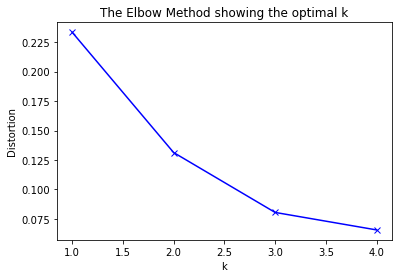

In [403]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(germany_grouped_clustering)
    kmeanModel.fit(germany_grouped_clustering)
    distortions.append(sum(np.min(cdist(germany_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / germany_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K,distortions,  'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## Create a new dataframe that includes the cluster as well as the top 10 venues for each city

In [404]:
Bundesland_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
germany_merged = df_data_1

germany_merged = germany_merged.join(Bundesland_venues_sorted.set_index('Bundesland'), on='Bundesland')

germany_merged

Bundesland  obj_zipCode  obj_purchasePrice   Latitude  Longitude  \
0               Sachsen         4571             445900  51.207790  12.508559   
1                Berlin        12357             545000  52.429200  13.488371   
2     Baden_Württemberg        69434             195000  49.459120   8.882796   
3    Schleswig_Holstein        24558             309000  53.780085  10.042314   
4         Niedersachsen        49774             267777  52.747950   7.593024   
5           Brandenburg        15838             311905  52.149110  13.380939   
6   Nordrhein_Westfalen        48167             485000  51.928470   7.742547   
7               Sachsen         2906              70000  51.285215  14.683627   
8               Sachsen         4523             225900  51.165376  12.237225   
9        Sachsen_Anhalt        39164             399000  52.075655  11.420386   
10               Hessen        61130             350000  50.243665   8.897300   
11  Nordrhein_Westfalen        40721             540000  51.165060   6.918261   
12       Sachsen_Anhalt         6179              39000  51.443935  11.842190   
13  Nordrhein_Westfalen        33161             650000  51.835255   8.669139   
14  Nordrhein_Westfalen        40878             440000  51.296299   6.847290   
15        Niedersachsen        28865             240000  53.168835   8.874200   
16        Niedersachsen        28832             549000  53.018410   9.024118   
18              Sachsen         4849             283400  51.601900  12.617169   
19              Hamburg        22587             750000  53.564570   9.795021   
20        Niedersachsen        30900             460000  52.563380   9.698173   
21  Nordrhein_Westfalen        50126             339000  50.966155   6.609907   
22               Hessen        63073             750000  50.086340   8.815731   
24          Brandenburg        14979             270000  52.364565  13.328530   
25               Bayern        94315             925000  48.874975  12.586470   
26   Schleswig_Holstein        25718             265000  53.997978   8.898545   
27        Niedersachsen        29353             148500  52.607300  10.288352   
28    Baden_Württemberg        68753             598079  49.229375   8.536001   
29               Bayern        86477             599982  48.423525  10.713047   
30        Niedersachsen        38364             248400  52.143625  10.969489   
31          Brandenburg        14513             270000  52.383070  13.276836   
32               Bremen        28201             420000  53.057430   8.810526   
33    Baden_Württemberg        72218             416900  48.637105   8.731994   
34  Nordrhein_Westfalen        42855             115000  51.195065   7.190864   
35       Sachsen_Anhalt        38899             203930  51.671250  10.839834   
36               Bayern        84326             440000  48.467610  12.709362   
37  Nordrhein_Westfalen        46446             150000  51.856790   6.233299   
38               Bayern        86860             475000  47.989150  10.702396   
39               Bayern        63849             415000  49.897780   9.235190   
40              Sachsen         4207             330000  51.302955  12.298302   
41    Baden_Württemberg        89191             298000  48.537040   9.790545   
42    Baden_Württemberg        76327             480000  48.991920   8.550006   
43    Baden_Württemberg        89564             329000  48.717635  10.260798   
44      Rheinland_Pfalz        55618             258200  49.813966   7.521330   
45              Hamburg        22045             550000  53.585105  10.127393   
46          Brandenburg        14959             270000  52.211760  13.210224   
47      Rheinland_Pfalz        55595             241900  49.868825   7.741583   
48             Saarland        66773                  0  49.307835   6.840157   
49  Nordrhein_Westfalen        45136             639000  51.437065   7.041664   
50          Brandenburg        16515        

In [405]:
germany_merged.dtypes

Bundesland                 object
obj_zipCode                 int64
obj_purchasePrice           int64
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [406]:
germany_merged.dropna(inplace=True)
germany_merged.head(100)


Bundesland  obj_zipCode  obj_purchasePrice   Latitude  Longitude  \
0               Sachsen         4571             445900  51.207790  12.508559   
1                Berlin        12357             545000  52.429200  13.488371   
2     Baden_Württemberg        69434             195000  49.459120   8.882796   
3    Schleswig_Holstein        24558             309000  53.780085  10.042314   
4         Niedersachsen        49774             267777  52.747950   7.593024   
5           Brandenburg        15838             311905  52.149110  13.380939   
6   Nordrhein_Westfalen        48167             485000  51.928470   7.742547   
7               Sachsen         2906              70000  51.285215  14.683627   
8               Sachsen         4523             225900  51.165376  12.237225   
9        Sachsen_Anhalt        39164             399000  52.075655  11.420386   
10               Hessen        61130             350000  50.243665   8.897300   
11  Nordrhein_Westfalen        40721             540000  51.165060   6.918261   
12       Sachsen_Anhalt         6179              39000  51.443935  11.842190   
13  Nordrhein_Westfalen        33161             650000  51.835255   8.669139   
14  Nordrhein_Westfalen        40878             440000  51.296299   6.847290   
15        Niedersachsen        28865             240000  53.168835   8.874200   
16        Niedersachsen        28832             549000  53.018410   9.024118   
18              Sachsen         4849             283400  51.601900  12.617169   
19              Hamburg        22587             750000  53.564570   9.795021   
20        Niedersachsen        30900             460000  52.563380   9.698173   
21  Nordrhein_Westfalen        50126             339000  50.966155   6.609907   
22               Hessen        63073             750000  50.086340   8.815731   
24          Brandenburg        14979             270000  52.364565  13.328530   
25               Bayern        94315             925000  48.874975  12.586470   
26   Schleswig_Holstein        25718             265000  53.997978   8.898545   
27        Niedersachsen        29353             148500  52.607300  10.288352   
28    Baden_Württemberg        68753             598079  49.229375   8.536001   
29               Bayern        86477             599982  48.423525  10.713047   
30        Niedersachsen        38364             248400  52.143625  10.969489   
31          Brandenburg        14513             270000  52.383070  13.276836   
32               Bremen        28201             420000  53.057430   8.810526   
33    Baden_Württemberg        72218             416900  48.637105   8.731994   
34  Nordrhein_Westfalen        42855             115000  51.195065   7.190864   
35       Sachsen_Anhalt        38899             203930  51.671250  10.839834   
36               Bayern        84326             440000  48.467610  12.709362   
37  Nordrhein_Westfalen        46446             150000  51.856790   6.233299   
38               Bayern        86860             475000  47.989150  10.702396   
39               Bayern        63849             415000  49.897780   9.235190   
40              Sachsen         4207             330000  51.302955  12.298302   
41    Baden_Württemberg        89191             298000  48.537040   9.790545   
42    Baden_Württemberg        76327             480000  48.991920   8.550006   
43    Baden_Württemberg        89564             329000  48.717635  10.260798   
44      Rheinland_Pfalz        55618             258200  49.813966   7.521330   
45              Hamburg        22045             550000  53.585105  10.127393   
46          Brandenburg        14959             270000  52.211760  13.210224   
47      Rheinland_Pfalz        55595             241900  49.868825   7.741583   
48             Saarland        66773                  0  49.307835   6.840157   
49  Nordrhein_Westfalen        45136             639000  51.437065   7.041664   
50          Brandenburg        16515        

In [407]:
germany_merged.drop_duplicates(subset='obj_zipCode',inplace=True)


## Visualize the clusters around Germany

In [408]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, bd, cluster in zip(germany_merged['Latitude'],germany_merged['Longitude'], germany_merged['Bundesland'], germany_merged['Cluster Labels']):
    label = folium.Popup(str('Bundesland') + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [409]:
bins = np.linspace(min(germany_merged["obj_purchasePrice"]), max(germany_merged["obj_purchasePrice"]), 4)
bins

array([      0.        , 1633333.33333333, 3266666.66666667,
       4900000.        ])

In [410]:
group_names=['Low Price','Medium Price','High Price']

In [411]:
germany_merged['Price-Categories'] = pd.cut(germany_merged['obj_purchasePrice'], bins, labels=group_names, include_lowest=True )
germany_merged[['obj_purchasePrice','Price-Categories']]

obj_purchasePrice Price-Categories
0              445900        Low Price
1              545000        Low Price
2              195000        Low Price
3              309000        Low Price
4              267777        Low Price
5              311905        Low Price
6              485000        Low Price
7               70000        Low Price
8              225900        Low Price
9              399000        Low Price
10             350000        Low Price
11             540000        Low Price
12              39000        Low Price
13             650000        Low Price
14             440000        Low Price
15             240000        Low Price
16             549000        Low Price
18             283400        Low Price
19             750000        Low Price
20             460000        Low Price
21             339000        Low Price
22             750000        Low Price
24             270000        Low Price
25             925000        Low Price
26             265000        Low Price
27             148500        Low Price
28             598079        Low Price
29             599982        Low Price
30             248400        Low Price
31             270000        Low Price
32             420000        Low Price
33             416900        Low Price
34             115000        Low Price
35             203930        Low Price
36             440000        Low Price
37             150000        Low Price
38             475000        Low Price
39             415000        Low Price
40             330000        Low Price
41             298000        Low Price
42             480000        Low Price
43             329000        Low Price
44             258200        Low Price
45             550000        Low Price
46             270000        Low Price
47             241900        Low Price
48                  0        Low Price
49             639000        Low Price
50             368900        Low Price
51             300000        Low Price
52            1275000        Low Price
53             185000        Low Price
54             190000        Low Price
55             368000        Low Price
56            1195000        Low Price
58             230000        Low Price
59             345000        Low Price
60             350000        Low Price
61             372500        Low Price
62             525000        Low Price
65             480000        Low Price
67             426800        Low Price
68             419000        Low Price
70             749000        Low Price
72             485000        Low Price
73             525000        Low Price
74             610000        Low Price
75             369000        Low Price
76             185000        Low Price
77             409000        Low Price
78              59000        Low Price
79             180000        Low Price
80            4900000       High Price
81            1059000        Low Price
82             160000        Low Price
83             382500        Low Price
84             125000        Low Price
85            2200000     Medium Price
87             222900        Low Price
88             525000        Low Price
89            1750000     Medium Price
90             798000        Low Price
91             239000        Low Price
92             179000        Low Price
93             330000        Low Price
94             630000        Low Price
95             449000        Low Price
96             140000        Low Price
97             640000        Low Price
98             629000        Low Price
99             715000        Low Price

In [412]:
bins = np.linspace(min(germany_merged["Cluster Labels"]), max(germany_merged["Cluster Labels"]), 4)
bins

array([0.        , 0.66666667, 1.33333333, 2.        ])

In [413]:
group_names = ['Hotels and Social Venues','Mueseums and Monuments', 'Stores,Restaurants and Bars']

In [414]:
germany_merged['Cluster-Category'] = pd.cut(germany_merged['Cluster Labels'], bins, labels=group_names, include_lowest=True )
germany_merged[['Cluster Labels','Cluster-Category']]

Cluster Labels             Cluster-Category
0                0     Hotels and Social Venues
1                2  Stores,Restaurants and Bars
2                0     Hotels and Social Venues
3                0     Hotels and Social Venues
4                1       Mueseums and Monuments
5                2  Stores,Restaurants and Bars
6                2  Stores,Restaurants and Bars
7                0     Hotels and Social Venues
8                0     Hotels and Social Venues
9                1       Mueseums and Monuments
10               0     Hotels and Social Venues
11               2  Stores,Restaurants and Bars
12               1       Mueseums and Monuments
13               2  Stores,Restaurants and Bars
14               2  Stores,Restaurants and Bars
15               1       Mueseums and Monuments
16               1       Mueseums and Monuments
18               0     Hotels and Social Venues
19               2  Stores,Restaurants and Bars
20               1       Mueseums and Monuments
21               2  Stores,Restaurants and Bars
22               0     Hotels and Social Venues
24               2  Stores,Restaurants and Bars
25               0     Hotels and Social Venues
26               0     Hotels and Social Venues
27               1       Mueseums and Monuments
28               0     Hotels and Social Venues
29               0     Hotels and Social Venues
30               1       Mueseums and Monuments
31               2  Stores,Restaurants and Bars
32               2  Stores,Restaurants and Bars
33               0     Hotels and Social Venues
34               2  Stores,Restaurants and Bars
35               1       Mueseums and Monuments
36               0     Hotels and Social Venues
37               2  Stores,Restaurants and Bars
38               0     Hotels and Social Venues
39               0     Hotels and Social Venues
40               0     Hotels and Social Venues
41               0     Hotels and Social Venues
42               0     Hotels and Social Venues
43               0     Hotels and Social Venues
44               2  Stores,Restaurants and Bars
45               2  Stores,Restaurants and Bars
46               2  Stores,Restaurants and Bars
47               2  Stores,Restaurants and Bars
48               2  Stores,Restaurants and Bars
49               2  Stores,Restaurants and Bars
50               2  Stores,Restaurants and Bars
51               0     Hotels and Social Venues
52               2  Stores,Restaurants and Bars
53               0     Hotels and Social Venues
54               0     Hotels and Social Venues
55               0     Hotels and Social Venues
56               2  Stores,Restaurants and Bars
58               0     Hotels and Social Venues
59               2  Stores,Restaurants and Bars
60               2  Stores,Restaurants and Bars
61               0     Hotels and Social Venues
62               2  Stores,Restaurants and Bars
65               0     Hotels and Social Venues
67               1       Mueseums and Monuments
68               0     Hotels and Social Venues
70               2  Stores,Restaurants and Bars
72               2  Stores,Restaurants and Bars
73               0     Hotels and Social Venues
74               0     Hotels and Social Venues
75               1       Mueseums and Monuments
76               2  Stores,Restaurants and Bars
77               0     Hotels and Social Venues
78               2  Stores,Restaurants and Bars
79               1       Mueseums and Monuments
80               0     Hotels and Social Venues
81               0     Hotels and Social Venues
82               2  Stores,Restaurants and Bars
83               0     Hotels and Social Venues
84               2  Stores,Restaurants and Bars
85               0     Hotels and Social Venues
87               0     Hotels and Social Venues
88               0     Hotels and Social Venues
89               0     Hotels and Social Venues
90               2  Stores,Restaurants and Bars
91               2  

## Conclusion

In [415]:

germany_merged

Bundesland  obj_zipCode  obj_purchasePrice   Latitude  Longitude  \
0               Sachsen         4571             445900  51.207790  12.508559   
1                Berlin        12357             545000  52.429200  13.488371   
2     Baden_Württemberg        69434             195000  49.459120   8.882796   
3    Schleswig_Holstein        24558             309000  53.780085  10.042314   
4         Niedersachsen        49774             267777  52.747950   7.593024   
5           Brandenburg        15838             311905  52.149110  13.380939   
6   Nordrhein_Westfalen        48167             485000  51.928470   7.742547   
7               Sachsen         2906              70000  51.285215  14.683627   
8               Sachsen         4523             225900  51.165376  12.237225   
9        Sachsen_Anhalt        39164             399000  52.075655  11.420386   
10               Hessen        61130             350000  50.243665   8.897300   
11  Nordrhein_Westfalen        40721             540000  51.165060   6.918261   
12       Sachsen_Anhalt         6179              39000  51.443935  11.842190   
13  Nordrhein_Westfalen        33161             650000  51.835255   8.669139   
14  Nordrhein_Westfalen        40878             440000  51.296299   6.847290   
15        Niedersachsen        28865             240000  53.168835   8.874200   
16        Niedersachsen        28832             549000  53.018410   9.024118   
18              Sachsen         4849             283400  51.601900  12.617169   
19              Hamburg        22587             750000  53.564570   9.795021   
20        Niedersachsen        30900             460000  52.563380   9.698173   
21  Nordrhein_Westfalen        50126             339000  50.966155   6.609907   
22               Hessen        63073             750000  50.086340   8.815731   
24          Brandenburg        14979             270000  52.364565  13.328530   
25               Bayern        94315             925000  48.874975  12.586470   
26   Schleswig_Holstein        25718             265000  53.997978   8.898545   
27        Niedersachsen        29353             148500  52.607300  10.288352   
28    Baden_Württemberg        68753             598079  49.229375   8.536001   
29               Bayern        86477             599982  48.423525  10.713047   
30        Niedersachsen        38364             248400  52.143625  10.969489   
31          Brandenburg        14513             270000  52.383070  13.276836   
32               Bremen        28201             420000  53.057430   8.810526   
33    Baden_Württemberg        72218             416900  48.637105   8.731994   
34  Nordrhein_Westfalen        42855             115000  51.195065   7.190864   
35       Sachsen_Anhalt        38899             203930  51.671250  10.839834   
36               Bayern        84326             440000  48.467610  12.709362   
37  Nordrhein_Westfalen        46446             150000  51.856790   6.233299   
38               Bayern        86860             475000  47.989150  10.702396   
39               Bayern        63849             415000  49.897780   9.235190   
40              Sachsen         4207             330000  51.302955  12.298302   
41    Baden_Württemberg        89191             298000  48.537040   9.790545   
42    Baden_Württemberg        76327             480000  48.991920   8.550006   
43    Baden_Württemberg        89564             329000  48.717635  10.260798   
44      Rheinland_Pfalz        55618             258200  49.813966   7.521330   
45              Hamburg        22045             550000  53.585105  10.127393   
46          Brandenburg        14959             270000  52.211760  13.210224   
47      Rheinland_Pfalz        55595             241900  49.868825   7.741583   
48             Saarland        66773                  0  49.307835   6.840157   
49  Nordrhein_Westfalen        45136             639000  51.437065   7.041664   
50          Brandenburg        16515        